# 4) ANALISIS DEL *DATASET* FINAL

> Análisis y Visualización del dataset final.

- author: Iván Fernández Aguirre
- toc: true
- image: images/N4.png
- sticky_rank: 4

In [1]:
#hide
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#hide
import nbimporter
import importlib

La mayoria de las funciones utilizadas en este projecto están en el modulo:

In [3]:
import Functions_for_FMP as fffmp

In [4]:
#hide
importlib.reload(fffmp)
import Functions_for_FMP as fffmp

## CARGA DE DATOS

Empezamos, como siempre, cargando los datos. Pero, en esta oportunidad, cargaremos el *dataset* generado en el bloque 2).

In [5]:
data_final='FMP_final'
FMP = pd.read_pickle(data_final)

In [6]:
fffmp.check_NaNs(FMP)

No hay missing values en el dataset :)


In [7]:
#collapse-output
display(FMP)

,id,target,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,home_rating_diff_1,home_rating_diff_2,home_rating_diff_3,home_rating_diff_4,home_rating_diff_5,home_rating_diff_6,home_rating_diff_7,home_rating_diff_8,home_rating_diff_9,home_rating_diff_10,away_rating_diff_1,away_rating_diff_2,away_rating_diff_3,away_rating_diff_4,away_rating_diff_5,away_rating_diff_6,away_rating_diff_7,away_rating_diff_8,away_rating_diff_9,away_rating_diff_10,Rating_diff,home_goal_diff_1,home_goal_diff_2,home_goal_diff_3,home_goal_diff_4,home_goal_diff_5,home_goal_diff_6,home_goal_diff_7,home_goal_diff_8,home_goal_diff_9,home_goal_diff_10,away_goal_diff_1,away_goal_diff_2,away_goal_diff_3,away_goal_diff_4,away_goal_diff_5,away_goal_diff_6,away_goal_diff_7,away_goal_diff_8,away_goal_diff_9,away_goal_diff_10,home_coach_continuity_1,home_coach_continuity_2,home_coach_continuity_3,home_coach_continuity_4,home_coach_continuity_5,home_coach_continuity_6,home_coach_continuity_7,home_coach_continuity_8,home_coach_continuity_9,home_coach_continuity,home_coach_continuity_10,away_coach_continuity_1,away_coach_continuity_2,away_coach_continuity_3,away_coach_continuity_4,away_coach_continuity_5,away_coach_continuity_6,away_coach_continuity_7,away_coach_continuity_8,away_coach_continuity_9,away_coach_continuity,away_coach_continuity_10,home_partidos_tres_semanas,home_partidos_diez_dias,home_partidos_cuatro_dias,away_partidos_tres_semanas,away_partidos_diez_dias,away_partidos_cuatro_dias,diff_num_partidos_tres_semanas,diff_num_partidos_diez_dias,diff_num_partidos_cuatro_dias,home_relevance_1,home_relevance_2,home_relevance_3,home_relevance_4,home_relevance_5,home_relevance_6,home_relevance_7,home_relevance_8,home_relevance_9,home_relevance_10,away_relevance_1,away_relevance_2,away_relevance_3,away_relevance_4,away_relevance_5,away_relevance_6,away_relevance_7,away_relevance_8,away_relevance_9,away_relevance_10,home_outcome_V_1,home_outcome_D_1,home_outcome_V_2,home_outcome_D_2,home_outcome_V_3,home_outcome_D_3,home_outcome_V_4,home_outcome_D_4,home_outcome_V_5,home_outcome_D_5,home_outcome_V_6,home_outcome_D_6,home_outcome_V_7,home_outcome_D_7,home_outcome_V_8,home_outcome_D_8,home_outcome_V_9,home_outcome_D_9,home_outcome_V_10,home_outcome_D_10,away_outcome_V_1,away_outcome_D_1,away_outcome_V_2,away_outcome_D_2,away_outcome_V_3,away_outcome_D_3,away_outcome_V_4,away_outcome_D_4,away_outcome_V_5,away_outcome_D_5,away_outcome_V_6,away_outcome_D_6,away_outcome_V_7,away_outcome_D_7,away_outcome_V_8,away_outcome_D_8,away_outcome_V_9,away_outcome_D_9,away_outcome_V_10,away_outcome_D_10,home_is_friendly_1,home_is_friendly_2,home_is_friendly_3,home_is_friendly_4,home_is_friendly_5,home_is_friendly_6,home_is_friendly_7,home_is_friendly_8,home_is_friendly_9,home_is_friendly_10,away_is_friendly_1,away_is_friendly_2,away_is_friendly_3

In [8]:
#collapse-output
fffmp.Print_features(FMP)

Today Features

id
target
is_cup
Rating_diff
home_coach_continuity
away_coach_continuity
home_partidos_tres_semanas
home_partidos_diez_dias
home_partidos_cuatro_dias
away_partidos_tres_semanas
away_partidos_diez_dias
away_partidos_cuatro_dias
diff_num_partidos_tres_semanas
diff_num_partidos_diez_dias
diff_num_partidos_cuatro_dias
is_friendly


Historic Features

home/away_team_history_is_play_home_i
home/away_team_history_is_cup_i
home/away_rating_diff_i
home/away_goal_diff_i
home/away_coach_continuity_i
home/away_relevance_i
home/away_outcome_V_i
home/away_outcome_D_i
home/away_is_friendly_i
home/away_result_ponderado_i


## ANÁLISIS Y VISUALIZACIÓN

La idea para este bloque es analizar y ganar un poco de intuición acerca de algunas de estas nuevas variables o *features* generadas

In [9]:
#hide
import seaborn as sns
sns.set_theme()

### 1) Distribución de la variable diferencia de gol

Comencé por estudiar el histograma de la diferencia de gol. Dado que correspondía a la resta de dos variables de Poisson, esperába que estuviera representado por una distribución de Skellam, cosa que pude comprobar al generar la curva correspondiente a los momentos del *dataset*.

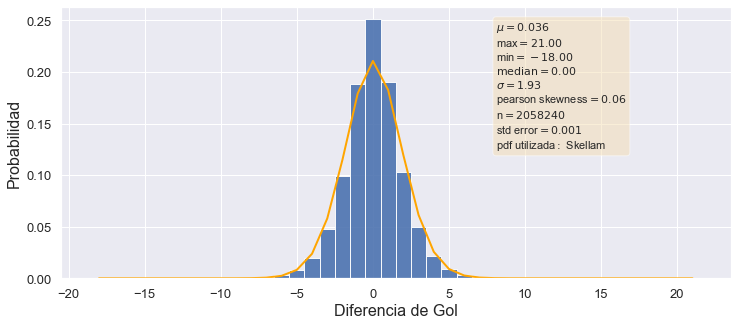

In [10]:
#collapse-hide
Features=['goal_diff']
Type=['historic']
n_bin=np.arange(-18,21+2)-0.5
Dist='Skellam'
y_label='Probabilidad'
x_label='Diferencia de Gol'
alignment='mid'
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment)

Tanto la simetría de la distribución (cuantificada de cierta forma por el *skewness*) como el hecho de que la media sea en la practica cero, son buenas señales. Nos dan una idea de que el *dataset* esta balanceado, habiendo tanto equipos de menor rendimiento (diferencia negativa) como de mayor (diferencia positiva).

Debe notarse que en este *set* de datos, tenemos mezclados tanto partidos de local y visitante.

**Si analizamos el efecto de la localía** encontramos nuevamente dos distribuciones de Skellam, pero en este caso con medias desplazada de cero y distintas. Efectivamente, cuando tomamos "local-visitante" ("visitante-local") la distribución esta centrada en un valor positivo (negativo). 

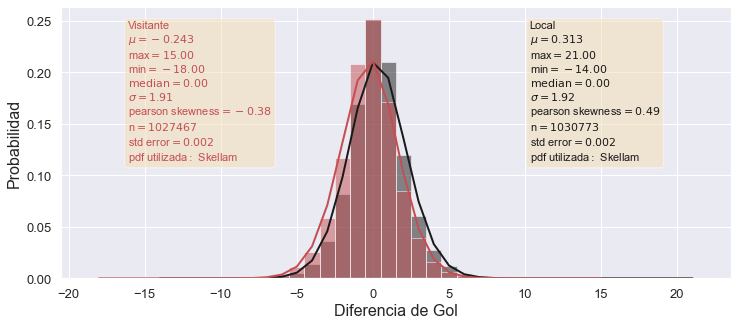

In [11]:
#collapse-hide
Feature='goal_diff'
Condition='team_history_is_play_home'
n_bin_local=np.arange(-14,21+2)-0.5
n_bin_visitante=np.arange(-18,15+2)-0.5
n_bin=[n_bin_local,n_bin_visitante]
Dist='Skellam'
y_label='Probabilidad'
x_label='Diferencia de Gol'
alignment='mid'
Cond_Labels=['Local','Visitante']
Text_box_pos=[0.7,0.1]
fffmp.Plot_distribution_por_Condicion(FMP,Feature,Condition,Cond_Labels,n_bin,Dist,x_label,y_label,alignment,Text_box_pos)

Haciendo ingeniería inversa, en base a $\mu$ u $\sigma$, podemos intentar recuperar los valores medios esperados para los goles anotados de local y visitante.

1) Para la curva "local":
    
$\mu_{gol\,local}=\frac{\sigma^2+\mu}{2}=2.000$
    
$\mu_{gol\,visitante}=\frac{\sigma^2-\mu}{2}=1.687$

2) Para la curva "visitante":
    
$\mu_{gol\,visitante}=\frac{\sigma^2+\mu}{2}=1.703$
    
$\mu_{gol\,local}=\frac{\sigma^2-\mu}{2}=1.946$

Sorpresivamente, si bien se mantiene una diferencia de aproximadamente $0.3$, los valores son sensiblemente más grandes comparados a los obtenidos en primera instancia. 

De hecho, si hacemos lo mismo para la distribución que no distingue locales de visitates, los valores medios hayados tambien son mas grandes de los esperados (aunque ahora alrrededor del mismo valor):

$\mu_{gol\,equipo}=\frac{\sigma^2+\mu}{2}=1.878$
    
$\mu_{gol\,oponente}=\frac{\sigma^2-\mu}{2}=1.845$


En principio dudé del proceso realizado para completar los valores faltantes. Sin embargo, si volvemos al dataset solo con la corrección de los valores faltantes y graficamos las distribuciones, recuperamos las originales sin sensibles alteraciones: 

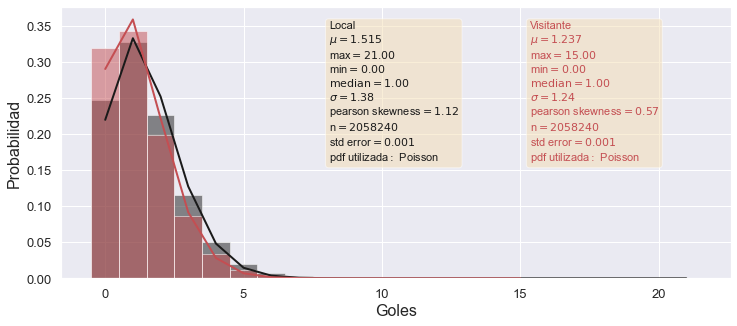

In [12]:
#collapse-hide
data_clean='FMP_clean'
fmp_aux = pd.read_pickle(data_clean)

Features_Team='team_history_goal'
Features_Opponent='team_history_opponent_goal'
Condition='team_history_is_play_home'
n_bin_local=np.arange(0,21+2)-0.5
n_bin_visitante=np.arange(0,15+2)-0.5
n_bin=[n_bin_local,n_bin_visitante]
Dist='Poisson'
y_label='Probabilidad'
x_label='Goles'
alignment='mid'
Cond_Labels=['Local','Visitante']
fffmp.Plot_distribution_por_Condicion_team_and_opp(fmp_aux,Features_Team,Features_Opponent,Condition,Cond_Labels,n_bin,Dist,x_label,y_label,alignment)
del(fmp_aux)

Tampoco espero errores en la forma de tratar las variables (correspondiente al bloque 3)). Para calcular la diferencia de gol el proceso es bastante directo, por lo que no hay mucho espacio para errores.

De esta forma, la explicación que encuentro es que variables no son independientes. De cierta forma podría tener sentido, estamos haciendo una resta entre eventos relacionados, que suceden en un mismo partidos. La performance de un equipo afecta a la otra!

Al menos eso pensé hasta ver que la correlación entre los goles anotados por un de un equipo y otro no parece muy alta:

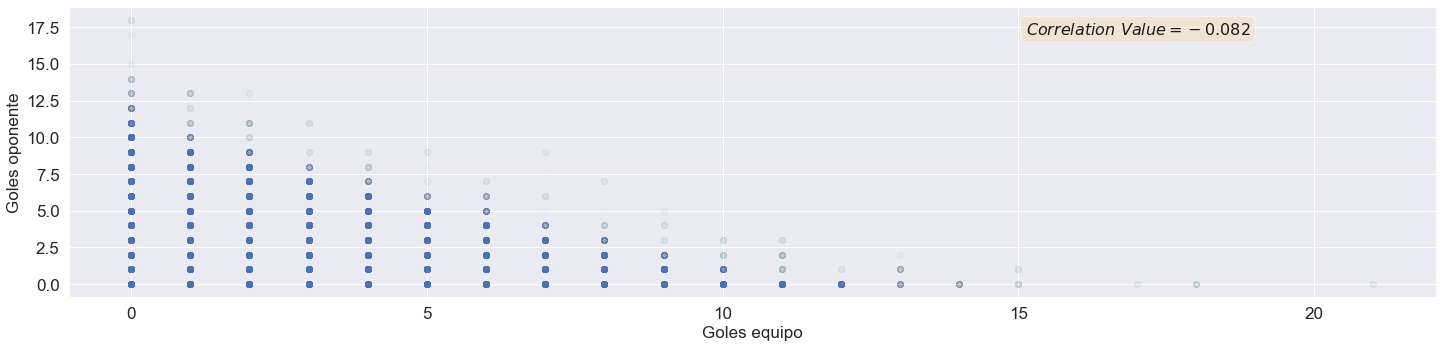

In [13]:
#collapse-hide
data_clean='FMP_clean'
fmp_aux = pd.read_pickle(data_clean)
X_feature=['team_history_goal']
Y_feature=['team_history_opponent_goal']
Plot_labels=['Goles equipo','Goles oponente']
alpha=0.006
fffmp.Correlacion_X_vs_Y_his(fmp_aux,X_feature,Y_feature,Plot_labels,alpha)
del(fmp_aux)#borramos de la memora el dataset para no llenar la memoria.

Si bien hay una correlacion negativa, es muy pequeña. 

De esta forma, esto es algo que aún no termino de entender bien. Pienso que quizás va por este lado, incluso el gráfico parece sugerirlo también.

**Por otro lado, podemos ver el efecto de jugar copa o liga** en la diferencia de goles observada.

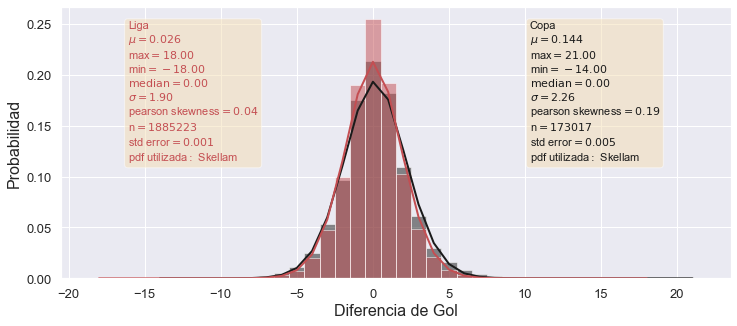

In [14]:
#collapse-hide
Feature='goal_diff'
Condition='team_history_is_cup'
n_bin_copa=np.arange(-13,21+2)-0.5
n_bin_liga=np.arange(-18,18+2)-0.5
n_bin=[n_bin_copa,n_bin_liga]
Dist='Skellam'
y_label='Probabilidad'
x_label='Diferencia de Gol'
alignment='mid'
Cond_Labels=['Copa','Liga']
Text_box_pos=[0.7,0.1]
fffmp.Plot_distribution_por_Condicion(FMP,Feature,Condition,Cond_Labels,n_bin,Dist,x_label,y_label,alignment,Text_box_pos)

Encontramos una leve diferencia entre ambas distribuciones que suguieren una tendencia a partidos con mayor diferencia de gol (dado el mayor $\sigma$), que quizás se pueda entender al ser partidos de eliminción. Es importante notar, de cualquier forma, que el numero de muestras para partidos de copa es un orden de magnitud menor, y por tanto quizas no haya tanta estadística.

### 2) Correlación de la diferencia de gol con la diferencia de *rating* y el resultado ponderado

En el dataset original ya havíamos explorado la relacion entre los goles anotados y el *rating* de un equipo. Ahora queremos ver quan relacionada están la diferencia en el marcador con la diferencia del *rating*. En principio uno esperaría una correlación más bien alta, en caso de que los *ratings* generados tengan sentido alguno.

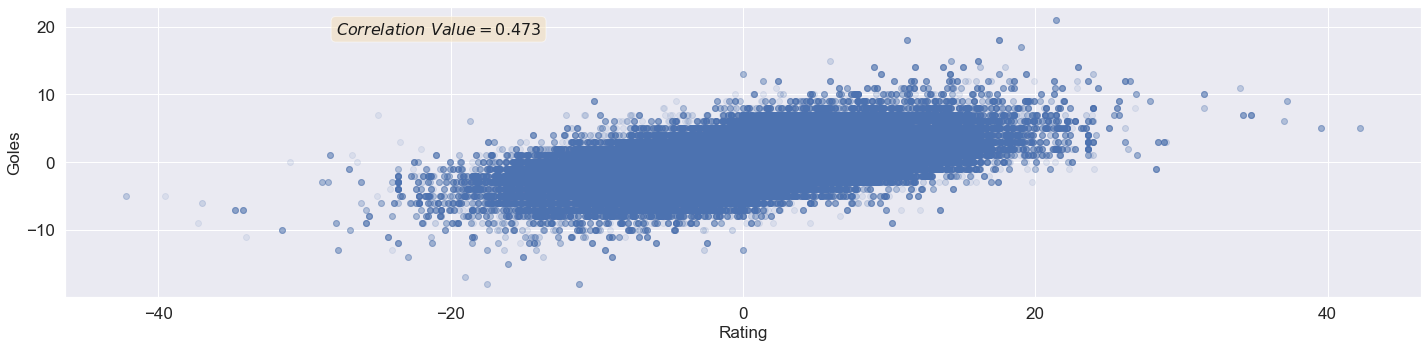

In [15]:
#collapse-hide
Y_feature=['goal_diff']
X_feature=['rating_diff']
Plot_labels=['Rating','Goles']
alpha=0.1
text_x_pos=0.2
fffmp.Correlacion_X_vs_Y_his(FMP,X_feature,Y_feature,Plot_labels,alpha,text_x_pos)

Tal como era de esperarse hay una correlación positiva importante entre estas dos variables. Incluso mayor que para la encontrada entre goles anotados y *rating* ($0.391$).

Si vamos luego a **el resultado ponderado**, este está forzadamente correlacionado con la diferencia de gol por definicion. De esta forma, tal como podemos ver, la correlación es mucho más alta.

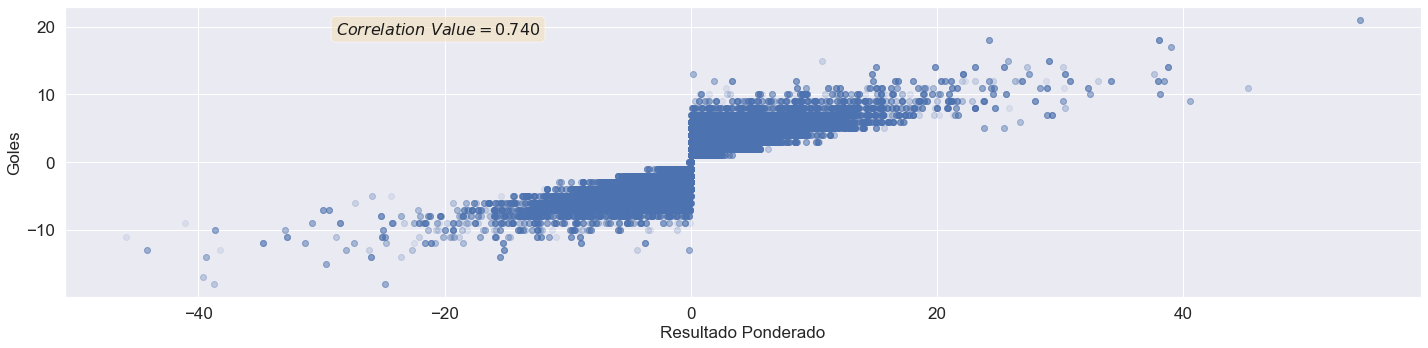

In [16]:
#collapse-hide
Y_feature=['goal_diff']
X_feature=['result_ponderado']
Plot_labels=['Resultado Ponderado','Goles']
alpha=0.1
text_x_pos=0.2
fffmp.Correlacion_X_vs_Y_his(FMP,X_feature,Y_feature,Plot_labels,alpha,text_x_pos)

Tengo que admitir que igualmente no me esperaba esa forma en la nube de puntos.

### 3) Distribución de la variable diferencia de *rating* y resultado ponderado

Solo por curiosidad, veamos decidí también dar una mirada a la distribución de esta variable.

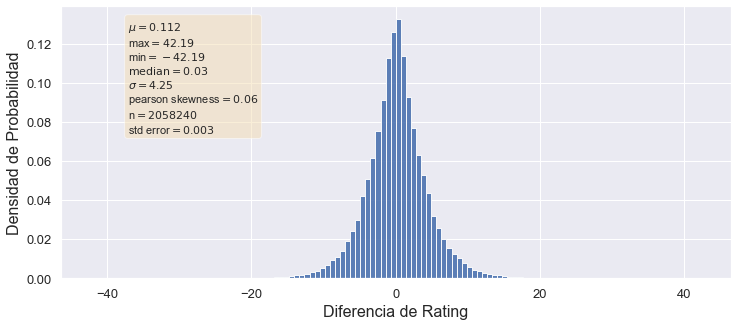

In [17]:
#collapse-hide
Features=['rating_diff']
Type=['historic']
n_bin=120
Dist='Unknown'
y_label='Densidad de Probabilidad'
x_label='Diferencia de Rating'
alignment='mid'
text_x_pos=0.1
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos)

La naturaleza de distribución esta vez no la vamos investigar. Pero al menos podemos ver que esta centrada en cero, lo que da signos de un *dataset* balanceado.

¿Qué pasa si miramos el **"Resultado Ponderado"**? Aquí la distruibución está más condensada alrrededor de cero, pero aun luce bastante balanceda.

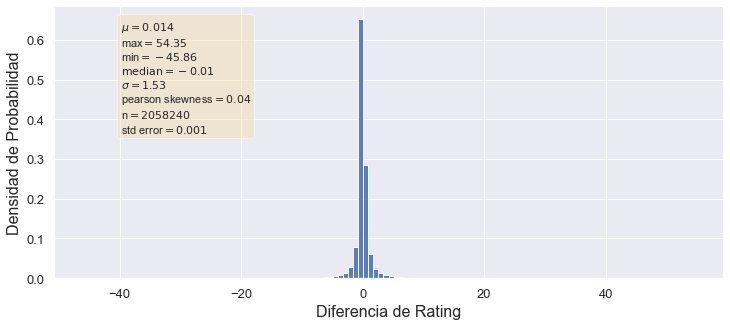

In [18]:
#collapse-hide
Features=['result_ponderado']
Type=['historic']
n_bin=120
Dist='Unknown'
y_label='Densidad de Probabilidad'
x_label='Diferencia de Rating'
alignment='mid'
text_x_pos=0.1
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos)

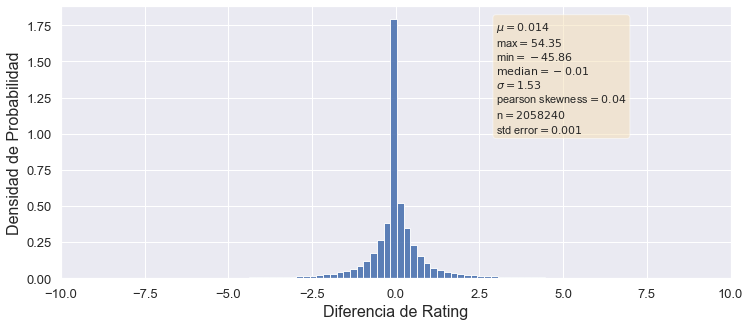

In [19]:
#collapse-hide
Features=['result_ponderado']
Type=['historic']
n_bin=500
Dist='Unknown'
y_label='Densidad de Probabilidad'
x_label='Diferencia de Rating'
alignment='mid'
text_x_pos=0.65
x_lim=(-10,10)
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos,x_lim)

### 4) Distribuciones relativas a la acumulación de partidos

Otro aspecto que agregamos fue el *featurte* de la acumulación de partidos. Este trata de capturar el desgaste acumuldo relativo entre dos equipos. Cómo habíamos explicado, si es positivo (negativo), el equipo local (visitante) tiene desventaja. Veamos que tal luce el histograma:

**A tres semanas:** Empezaremos por mirar de forma separada los datos para el equipo local y visitante. Vemos que ambos histogramas indistinguibles en la practica, y pueden ser bien descriptos por una distribución de Poisson. Esto tiene sentido por la naturaleza del fenómeno, donde podemos definir una cantidad "media" de partidos por ventana de tiempo.

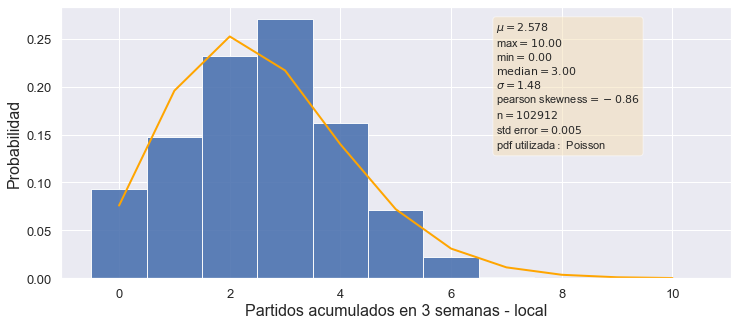

In [20]:
#collapse-hide
Features=['home_partidos_tres_semanas']
Type=['match']
n_bin=np.arange(0,10+2)-0.5
Dist='Poisson'
y_label='Probabilidad'
x_label='Partidos acumulados en 3 semanas - local'
alignment='mid'
text_x_pos=0.65
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos)

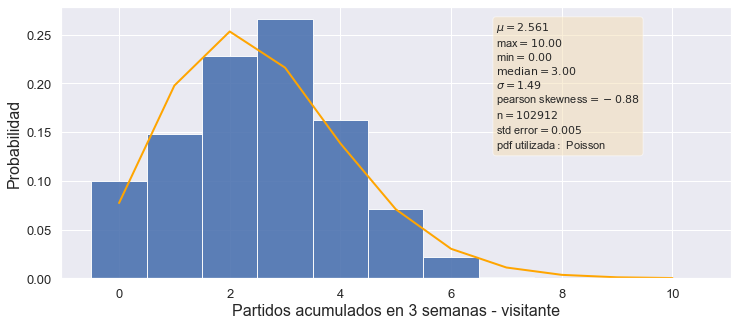

In [21]:
#collapse-hide
Features=['away_partidos_tres_semanas']
Type=['match']
n_bin=np.arange(0,10+2)-0.5
Dist='Poisson'
y_label='Probabilidad'
x_label='Partidos acumulados en 3 semanas - visitante'
alignment='mid'
text_x_pos=0.65
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos)

Decidí entonces juntar ambos datasets en uno solo. Podemos ver que en una ventana de 21 días, los equipos juegan una media de 2.34 partidos, lo que parece un valor razonable, aunque un poco por debajo de lo esperado.

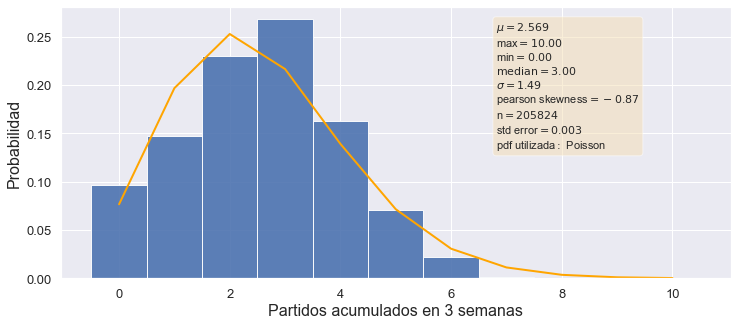

In [22]:
#collapse-hide
Features=['home_partidos_tres_semanas','away_partidos_tres_semanas']
Type=['match','match']
n_bin=np.arange(0,10+2)-0.5
Dist='Poisson'
y_label='Probabilidad'
x_label='Partidos acumulados en 3 semanas'
alignment='mid'
text_x_pos=0.65
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos)

Si miramos ahora a la **diferencia de partidos acumulados**, su distribución, si bien parecería a primera vista poder estar descripta por una distribución de de Skellam, muestra sensibles diferencias con esta. Lo mismo pasa a 10 días y a 3 días.

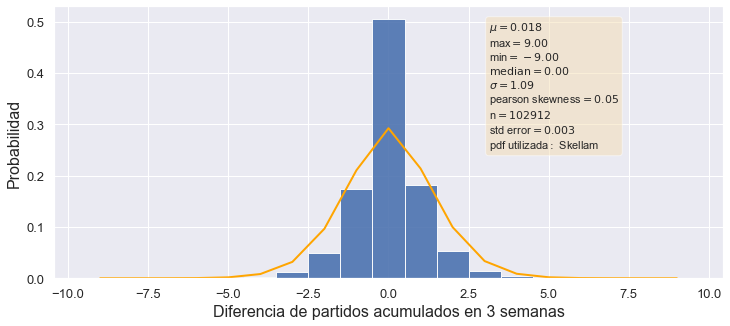

In [23]:
#collapse-hide
Features=['diff_num_partidos_tres_semanas']
Type=['match']
n_bin=np.arange(-9,9+2)-0.5
Dist='Skellam'
y_label='Probabilidad'
x_label='Diferencia de partidos acumulados en 3 semanas'
alignment='mid'
text_x_pos=0.65
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos)

**A diez días:**

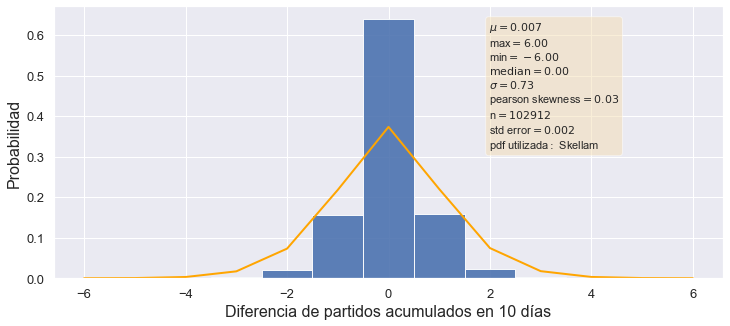

In [24]:
#collapse-hide
Features=['diff_num_partidos_diez_dias']
Type=['match']
n_bin=np.arange(-5,5+2)-0.5
Dist='Skellam'
y_label='Probabilidad'
x_label='Diferencia de partidos acumulados en 10 días'
alignment='mid'
text_x_pos=0.65
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos)

**A tres días:**

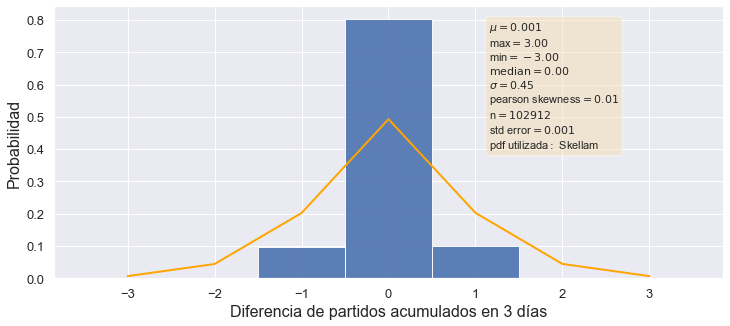

In [25]:
#collapse-hide
Features=['diff_num_partidos_cuatro_dias']
Type=['match']
n_bin=np.arange(-3,3+2)-0.5
Dist='Skellam'
y_label='Probabilidad'
x_label='Diferencia de partidos acumulados en 3 días'
alignment='mid'
text_x_pos=0.65
fffmp.Plot_one_distribution(FMP,Features,Type,n_bin,Dist,x_label,y_label,alignment,text_x_pos)

La razón detras de ello podría estar relacionada con el hecho de que al mirar los partidos acumulados, estamos observando el resultado de todas las ligas en conjunto. Sin embargo, cuando miramos la diferencia, este valor corresponde a equipos de una misma liga, y, por tanto, con calendarios similares. Esto llevaría a que la diferencia de partidos acumulados de zero más veces de las esperadas, lo que puede explicar la marcada diferencia encontrada en zero entre el histograma y la distribuciñon propuesta.

### 5) Efecto del cambio de entrenador

Dejamos un poco de lado las distribuciones, para analizar el efecto (si lo hay) del cambio de entrenador en el rendimiento de un equipo. 

Para analizar ello calculamos el porcentage medio de victorias, derrotas y empates que presentaron los equipos con cambio de entrenador, en los partidos alrededor de dicho suceso.

,Condición,Muestras,% Local,% Victorias,% Empates:,% Derrotas
0,General,1852416,50.08,36.90,25.11,38.00
1,5 partidos antes de un cambio de entrenador,22516,50.31,37.66,25.13,37.21
2,4 partidos antes de un cambio de entrenador,28387,50.16,37.34,27.37,35.29
3,3 partidos antes de un cambio de entrenador,34295,50.05,38.02,26.03,35.95
4,2 partidos antes de un cambio de entrenador,40212,49.93,38.32,26.28,35.40
5,1 partidos antes de un cambio de entrenador,46115,49.86,38.51,26.28,35.21
6,En el partido de un cambio de entrenador,51953,49.83,39.27,25.53,35.20
7,1 partidos después de un cambio de entrenador,46563,49.74,44.74,24.10,31.16
8,2 partidos después de un cambio de entrenador,40956,49.65,45.10,24.41,30.49
9,3 partidos después de un cambio de entrenador,35234,49.55,44.06,24.24,31.71


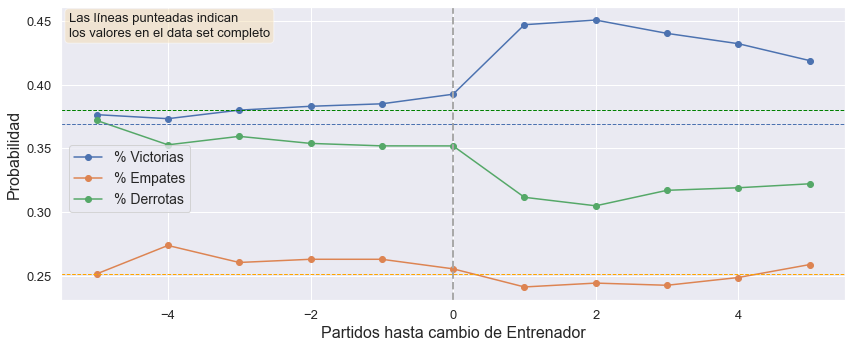

In [26]:
#collapse-hide
fffmp.Trainer_effect_on_the_outcome(FMP,5)

De forma bastante interesante, sí se pueden ver una mejora en el rendimiento alrrededor de dicho evento. Aunque dicho efecto o *boost* parece ir decreciendo a medida pasan los partidos.

### 6) Impacto de distintas variables en la probabilidad de los resultados

El objetivo final de este proyecto no es otro que intentar modelar la probabilidad de cada uno de los tres resultados posibles (Victoria local, Victoria visitante y Empate) en función de las variables del *dataset*. En ese sentido, resulta de interés evaluar como estas alteran las probabilidades de los resultados.

#### A) Partidos acumulados

Empezaremos por mirar el efecto de la acumulación de partidos, concentrándonos en el efecto de que el local o visitante acumule más partidos.

Si miramos en una ventana de tres semanas:

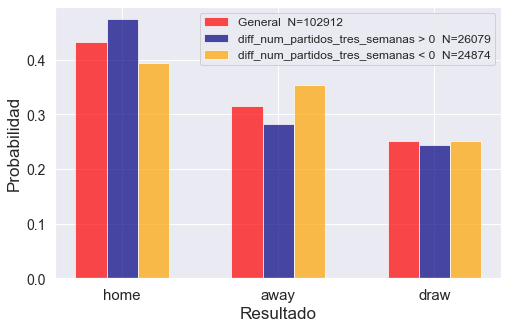

In [27]:
#collapse-hide
variable='target'
variable_condicional='diff_num_partidos_tres_semanas'
condicion_numerica=0
x_label='Resultado'
tipo_de_condición='><_value'
fffmp.Histograma_condicional_numerica(FMP,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label)

Podemos ver que acumular más partidos esta correlacionado con un aumento en las probabilides de ganar. Esto es bastante anti-intuitivo, y, de hecho, estaba convencido que el efecto sería el contrario. Creo que quizás podría explicarse considerando que los equipos que participan en más competiciones (y por tanto juegan más partidos), suelen mostrar un mejor nivel y por tanto ser más proclives a ganar.

Si llevamos el umbral un poco más lejos podemos ver que esta tendencia no hace más que acentuarse:

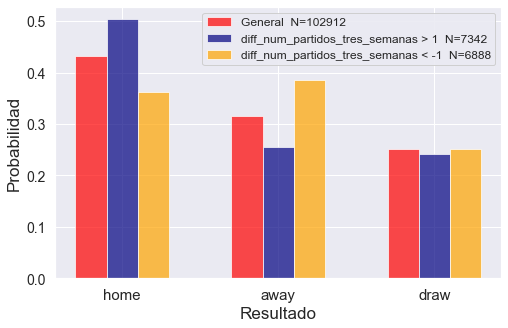

In [28]:
#collapse-hide
variable='target'
variable_condicional='diff_num_partidos_tres_semanas'
condicion_numerica=1
x_label='Resultado'
tipo_de_condición='><_value'
fffmp.Histograma_condicional_numerica(FMP,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label)

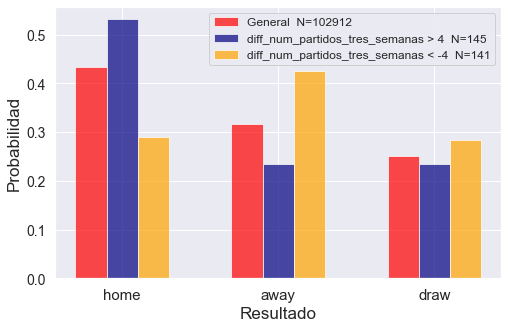

In [29]:
#collapse-hide
variable='target'
variable_condicional='diff_num_partidos_tres_semanas'
condicion_numerica=4
x_label='Resultado'
tipo_de_condición='><_value'
fffmp.Histograma_condicional_numerica(FMP,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label)

Aunque se debe notar que a medida que lo hacemos el numero de muestras se ve reducido drásticamente.

Por completitud, podemos mirar también lo que ocurre para ventanas de 4 y 10 días

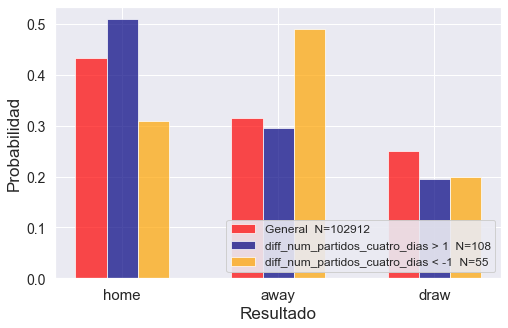

In [30]:
#collapse-hide
variable='target'
variable_condicional='diff_num_partidos_cuatro_dias'
condicion_numerica=1
x_label='Resultado'
tipo_de_condición='><_value'
fffmp.Histograma_condicional_numerica(FMP,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label,'lower right')

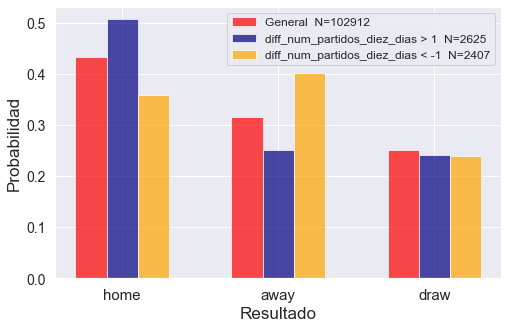

In [31]:
#collapse-hide
variable='target'
variable_condicional='diff_num_partidos_diez_dias'
condicion_numerica=1
x_label='Resultado'
tipo_de_condición='><_value'
fffmp.Histograma_condicional_numerica(FMP,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label)

Efectivamente, la tendencia es la misma sin importar la ventana de tiempo considerada para calcular la acumulación de partidos.

#### B) Cambio de entrenador

Podemos hacer un análisis similar, poniendo el foco en la continuidad del entrenador:

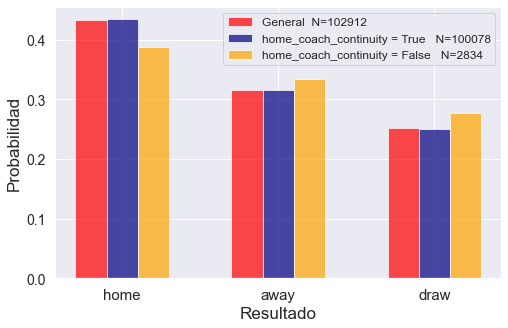

In [32]:
#collapse-hide
variable='target'
variable_condicional='home_coach_continuity'
condicion_numerica=1
x_label='Resultado'
tipo_de_condición='bool'
fffmp.Histograma_condicional_numerica(FMP,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label)

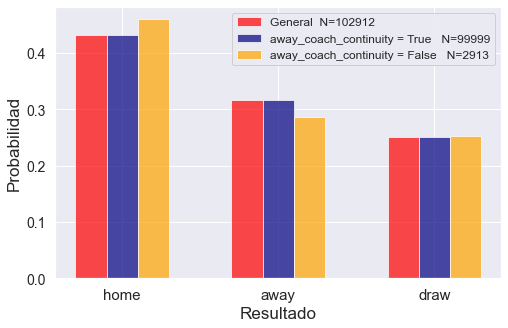

In [33]:
#collapse-hide
variable='target'
variable_condicional='away_coach_continuity'
condicion_numerica=1
x_label='Resultado'
tipo_de_condición='bool'
fffmp.Histograma_condicional_numerica(FMP,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label)

Tal como vemos, la continuidad de un entrenador parece correlacionarse con una mayor probabilidad de ganar. Esto se ve razonable si pensamos que los cambios de entrenadores suelen estar relacionados con malos resultados.

Pese a ello, puede que este resultado sea confuso después de lo visto en el punto 5. ¿No habíamos dicho que el cambio de entrenador tenía un efecto positivo? Si, pero ese efecto es relativo. Un equipo incrementa su porcentaje de victorias gracias a un cambio de entrenador, pero eso no implica que vaya a tener mejores resultados que los equipos donde no fue necesario dicho cambio.

Dicho esto, es igual notable que el porcntaje de victorias es más grande que el de derrotas, en el punto 5.  Eso es algo un poco confuso aun para mi. Pero es importante notar que ambos análisis son realizados sobre partes del dataset distintas. En este caso nos centramos en el grupo de partidos a modelar, mientras que para el punto 5 usamos los datos históricos. 

#### C) Tipo de competición

Podemos analisar también como el tipo de competición influye en la distribución de resultados:

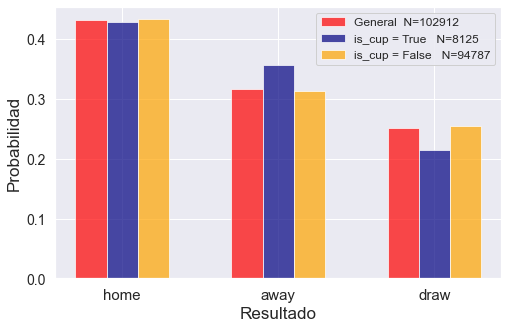

In [34]:
#collapse-hide
variable='target'
variable_condicional='is_cup'
condicion_numerica=1
x_label='Resultado'
tipo_de_condición='bool'
fffmp.Histograma_condicional_numerica(FMP,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label)

Se puede ver como hay un mayor porcentaje de victorias visitantes en los partidos de copa comparados a los de liga. Eso puede deberse a que muchas veces se juegan en campo neutral.

#### D) Diferencia de *rating*

Finalmente, podemos dar una mirada a como la diferencia de *rating* medio entre el equipo visitante y local esta relacionado con el resultado:

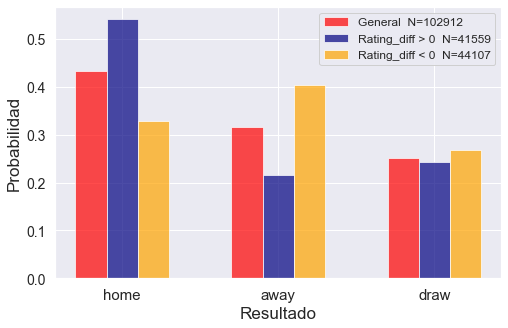

In [35]:
#collapse-hide
variable='target'
variable_condicional='Rating_diff'
condicion_numerica=0
x_label='Resultado'
tipo_de_condición='><_value'
fffmp.Histograma_condicional_numerica(FMP,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label)

Como es de esperarse, el equipo con mayor rating tiene una mayor probabilidad de victoria (Recordemos que $\Delta Rating= Rating_{medio}(local)-Rating_{medio}(visitante)$).

Esto se ve aún más exacerbado, al mirar  a diferencias de *rating* mayores.

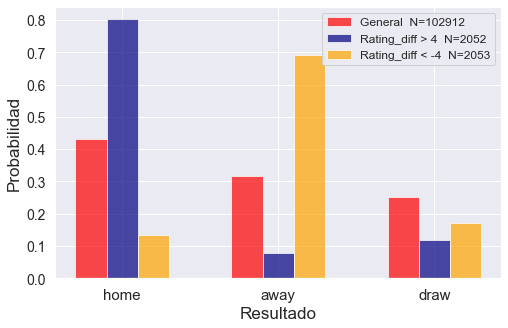

In [36]:
#collapse-hide
variable='target'
variable_condicional='Rating_diff'
condicion_numerica=4
x_label='Resultado'
tipo_de_condición='><_value'
fffmp.Histograma_condicional_numerica(FMP,variable,variable_condicional,tipo_de_condición,condicion_numerica,x_label)

Como último comentario, es interesante notar como diferencias de rating altas bajan drasticamente la probabilidad de empate.

### 7) Matrrices de Correlación

Cómo última cosa a analizar, quise darle una mirada a las matrices de correlación.

Para ello comenzamos por revisar cuales son las variables o *features* del *dataset*

In [37]:
#collapse-output
fffmp.Print_features(FMP)

Today Features

id
target
is_cup
Rating_diff
home_coach_continuity
away_coach_continuity
home_partidos_tres_semanas
home_partidos_diez_dias
home_partidos_cuatro_dias
away_partidos_tres_semanas
away_partidos_diez_dias
away_partidos_cuatro_dias
diff_num_partidos_tres_semanas
diff_num_partidos_diez_dias
diff_num_partidos_cuatro_dias
is_friendly


Historic Features

home/away_team_history_is_play_home_i
home/away_team_history_is_cup_i
home/away_rating_diff_i
home/away_goal_diff_i
home/away_coach_continuity_i
home/away_relevance_i
home/away_outcome_V_i
home/away_outcome_D_i
home/away_is_friendly_i
home/away_result_ponderado_i


Dado que tenemos más de 200 columnas, dividiremos el análisis en distintas partes. Las *Today Features* (*Match_day_Features* en adelante) las representaremos todas juntas, mientras que para las *Historic Features* haremos graficos individuales para que sea más accesible la visualización.

Es importante también mencionar que se representará la matriz de correlación $M$ como $sign(M)\,\sqrt{abs(M)}$, para facilitar el análisis. Cómo referencia, adjuntamos un tabla de valores de referencia:

In [38]:
#hide
real=np.array([0.0001,0.001,0.01,0.02,0.03,0.05,0.1,0.25,0.3,0.5,0.8,1])
scale=np.sqrt(real)
display(pd.DataFrame({'Original':real,'Transformado':scale}))

,Original,Transformado
0,0.0001,0.010000
1,0.0010,0.031623
2,0.0100,0.100000
3,0.0200,0.141421
4,0.0300,0.173205
5,0.0500,0.223607
6,0.1000,0.316228
7,0.2500,0.500000
8,0.3000,0.547723
9,0.5000,0.707107


#### A) Variables del día del partido

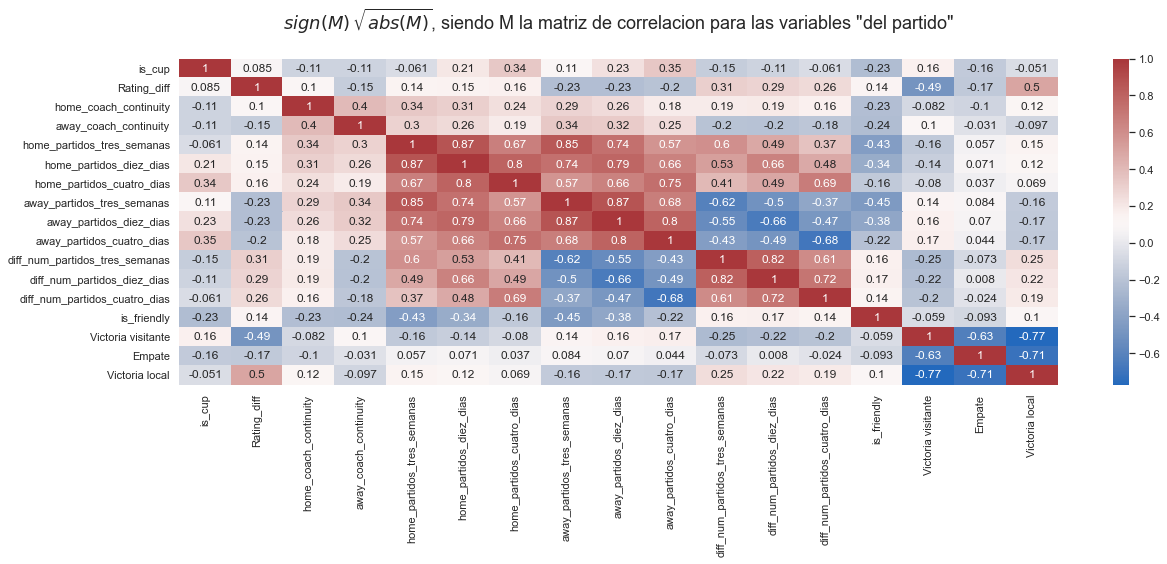

In [39]:
tipo='Match_day_Features'
fffmp.Matrices_de_correlacion_All_Features(FMP,tipo)

Observaciones:

   * En general no hay variables que muestren una alta correlacion con los targets. La mayor correlacion la encontramos para el la diferencia de *rating* que muestra un $0.25$ de valor real.
   * Se puede observar un bloque altamente correlacionado en el centro que corresponde a las variables de acumulación de partidos. Esto tiene sentido por como estan definidas.

#### B) Diferencia de gol en los partidos anteriores

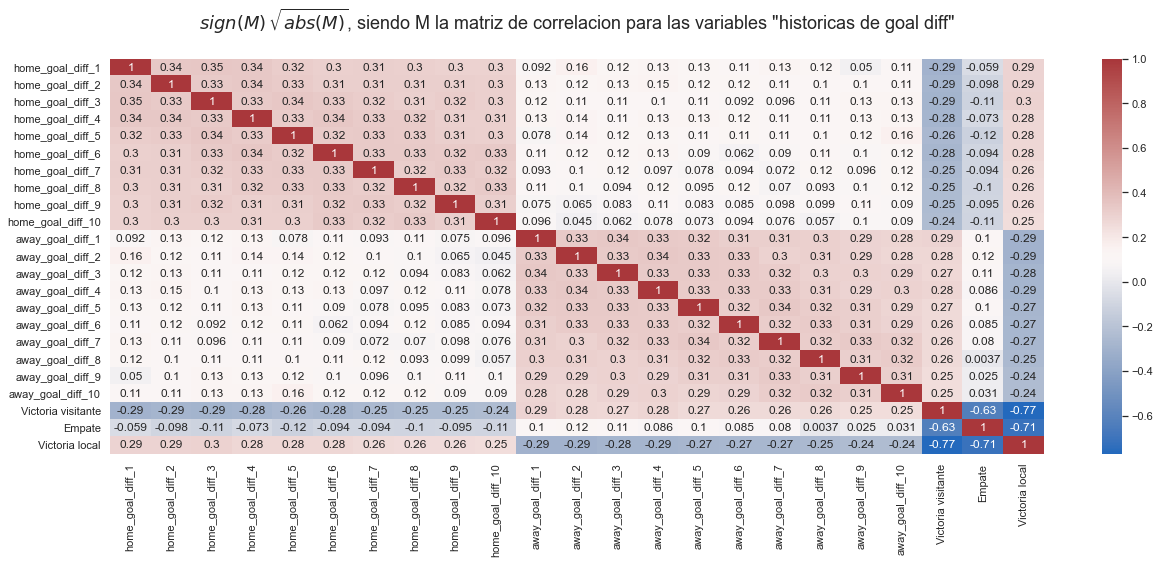

In [40]:
historic_feature=['goal_diff','rating_diff','coach_continuity','team_history_is_play_home','team_history_is_cup','result_ponderado']
tipo='Historicas'
fffmp.Matrices_de_correlacion_All_Features(FMP,tipo,historic_feature[0])

Observaciones:

   * Como era de esperarse, resultados positivos en partidos anteriores aumentan la probabilidad de una victoria en el partido del día, y visceversa.
   * Esta correlacion también se ve reflejada entre partidos del historial. Mas aún, parecería haber una mayor correlacion dependiendo de la cercanía entre los partidos (i.e. los valores cercanos a la diagonal son ligeramente más grandes).

#### C) Diferencia de *rating* en los partidos anteriores

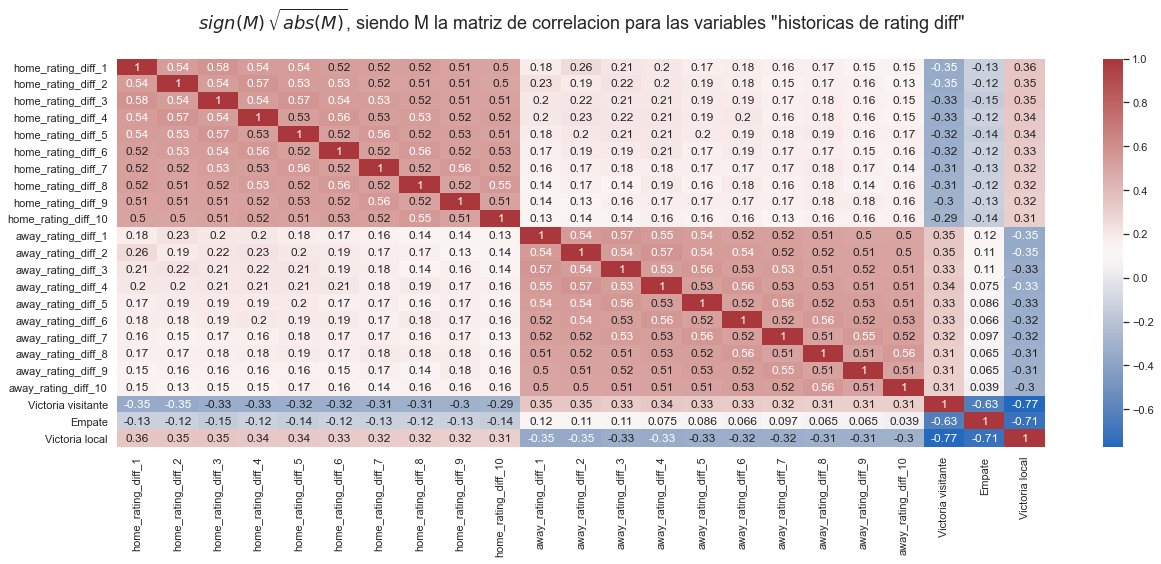

In [41]:
historic_feature=['goal_diff','rating_diff','coach_continuity','team_history_is_play_home','team_history_is_cup','result_ponderado']
tipo='Historicas'
fffmp.Matrices_de_correlacion_All_Features(FMP,tipo,historic_feature[1])

Observaciones:
   * La situación aqui es similar a lo visto para la diferencia de gol. Diferencias de *rating* altas en partidos anteriores se relacionan con mayores probabilidades de victoria. 
   * Además, de forma similar a lo visto para la diferencia de gol, las diferencias de *rating* historicas estan correlacionadas: un equipo que muestra una diferencia positiva para un partido tendrá mas chances de mostrar una diferencia positiva para otro. Estos valores, vale la pena notar son bastante altos para lo visto en general ($0.3$). 

#### D) Resultado ponderado

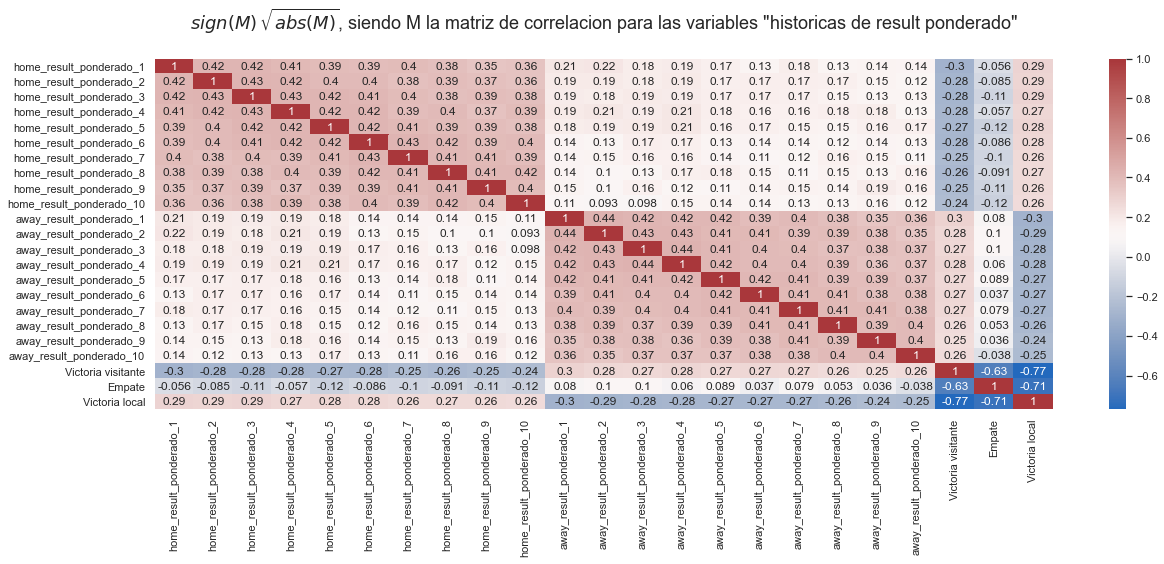

In [42]:
historic_feature=['goal_diff','rating_diff','coach_continuity','team_history_is_play_home','team_history_is_cup','result_ponderado']
tipo='Historicas'
fffmp.Matrices_de_correlacion_All_Features(FMP,tipo,historic_feature[5])

Observaciones:
   * Lo visto aqui es muy similar a lo obtenido para la diferencia de rating y de goal. Podríamos verlo como un punto medio entre ellos.

#### 5) Continuidad del Entrenador

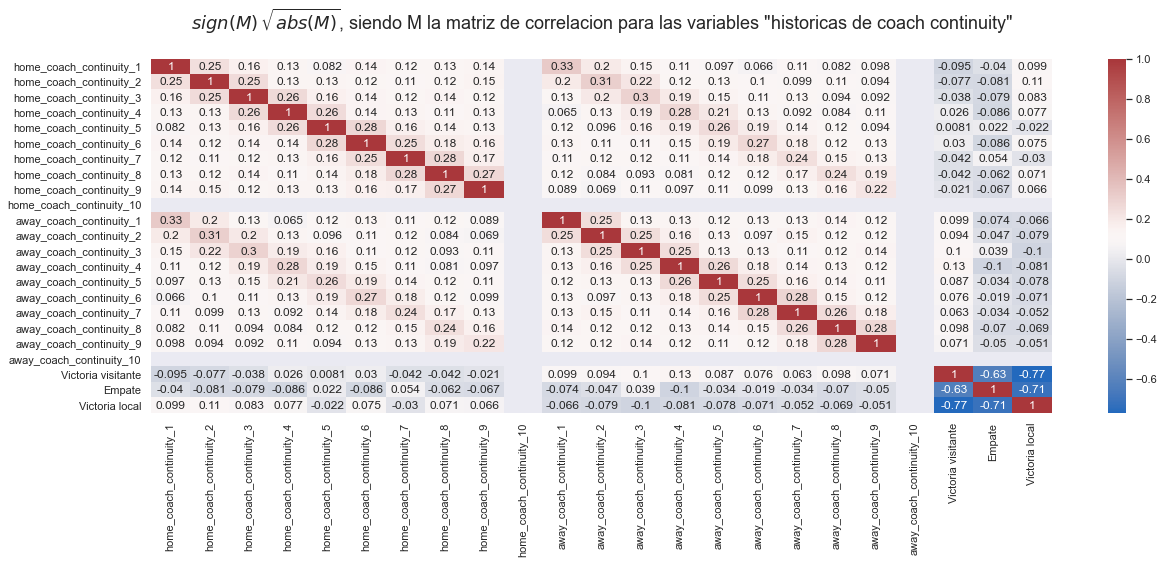

In [43]:
historic_feature=['goal_diff','rating_diff','coach_continuity','team_history_is_play_home','team_history_is_cup','result_ponderado']
tipo='Historicas'
fffmp.Matrices_de_correlacion_All_Features(FMP,tipo,historic_feature[2])

Aquí no parece haber realmente ningún patron importante...